In [3]:
import tsai
from tsai.all import *

In [2]:
dsid = 'NATOPS'
X, y, splits = get_UCR_data(dsid, split_data=False)

In [4]:
check_data(X, y, splits)

X      - shape: [360 samples x 24 features x 51 timesteps]  type: memmap  dtype:float32  isnan: 0
y      - shape: (360,)  type: memmap  dtype:<U3  n_classes: 6 (60 samples per class) ['1.0', '2.0', '3.0', '4.0', '5.0', '6.0']  isnan: False
splits - n_splits: 2 shape: [180, 180]  overlap: [False]
[[[-0.372758 -0.367844 -0.378445 ... -0.537007 -0.475939 -0.479505]
  [-1.821679 -1.841987 -1.821358 ... -1.751323 -1.772353 -1.761632]
  [-0.846321 -0.846325 -0.839571 ... -0.60374  -0.763048 -0.793202]
  ...
  [ 0.619205  0.617045  0.624789 ...  0.541325  0.559272  0.571569]
  [-1.771773 -1.79666  -1.738568 ... -1.691657 -1.683121 -1.721661]
  [-0.810086 -0.818863 -0.78806  ... -0.716364 -0.757526 -0.741532]]

 [[-0.54737  -0.546334 -0.549748 ... -0.533726 -0.528338 -0.518618]
  [-1.600105 -1.599419 -1.595734 ... -1.576063 -1.572246 -1.565955]
  [-0.809446 -0.80942  -0.812398 ... -0.766209 -0.764902 -0.765835]
  ...
  [ 0.618919  0.648665  0.618913 ...  0.455396  0.457002  0.456688]
  [-1.497

In [6]:
print('multivariate datasets: ', get_UCR_multivariate_list())

multivariate datasets:  ['ArticularyWordRecognition', 'AtrialFibrillation', 'BasicMotions', 'CharacterTrajectories', 'Cricket', 'DuckDuckGeese', 'EigenWorms', 'Epilepsy', 'ERing', 'EthanolConcentration', 'FaceDetection', 'FingerMovements', 'HandMovementDirection', 'Handwriting', 'Heartbeat', 'InsectWingbeat', 'JapaneseVowels', 'Libras', 'LSST', 'MotorImagery', 'NATOPS', 'PEMS-SF', 'PenDigits', 'PhonemeSpectra', 'RacketSports', 'SelfRegulationSCP1', 'SelfRegulationSCP2', 'SpokenArabicDigits', 'StandWalkJump', 'UWaveGestureLibrary']


In [13]:
from covid19.datasets import RnboGovUa

df = RnboGovUa().prepare(metrics=RnboGovUa.metrics, country_filter=['Ukraine'])
# df = RnboGovUa().prepare(metrics=RnboGovUa.metrics, country_filter=None)
# df = df.drop(columns=['date', 'country', 'region'])
print(df.head(5))

2021-02-09 13:01:01,677 INFO |covid19.datasets| Dataset range: 2020-04-01 00:00:00 - 2021-02-08 00:00:00


          date  country           country_region           region  existing  \
idx                                                                           
0   2020-04-01  Ukraine        Ukraine_Vinnytsia        Vinnytsia      51.0   
0   2020-04-01  Ukraine         Ukraine_Volynska         Volynska      10.0   
0   2020-04-01  Ukraine  Ukraine_Dnipropetrovska  Dnipropetrovska       9.0   
0   2020-04-01  Ukraine         Ukraine_Donetska         Donetska       7.0   
0   2020-04-01  Ukraine      Ukraine_Zhytomyrskа      Zhytomyrskа       5.0   

     confirmed  suspicion  delta_confirmed  deaths  recovered  delta_existing  \
idx                                                                             
0         51.0      133.0              9.0     0.0        0.0             9.0   
0         10.0      176.0              3.0     0.0        0.0             3.0   
0         10.0       96.0              1.0     0.0        1.0             1.0   
0          7.0       80.0              1.

In [12]:
X, y = df2xy(
    df,
    feat_col='country_region',
    data_cols=['suspicion', 'confirmed'],
    target_col='delta_confirmed', to3d=True)
print(X.shape)

ValueError: cannot reshape array of size 133550 into shape (217,newaxis,2)

In [22]:
splits = get_splits(y, valid_size=.2, stratify=True, random_state=23, shuffle=True)
tfms  = [None, Float()]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits)

In [23]:
dsets

(#314) [(TSTensor(vars:25, len:2), tensor(9)),(TSTensor(vars:25, len:2), tensor(3)),(TSTensor(vars:25, len:2), tensor(1)),(TSTensor(vars:25, len:2), tensor(1)),(TSTensor(vars:25, len:2), tensor(1)),(TSTensor(vars:25, len:2), tensor(0)),(TSTensor(vars:25, len:2), tensor(6)),(TSTensor(vars:25, len:2), tensor(10)),(TSTensor(vars:25, len:2), tensor(7)),(TSTensor(vars:25, len:2), tensor(3))...]

In [28]:
# tfms  = [None, [TSRegression()]]
dls = get_ts_dls(X, y, tfms=None, splits=splits, bs=2)
dls.one_batch()

(TSTensor(samples:2, vars:25, len:2), tensor([ 3, 23]))

In [29]:
dls.c

40

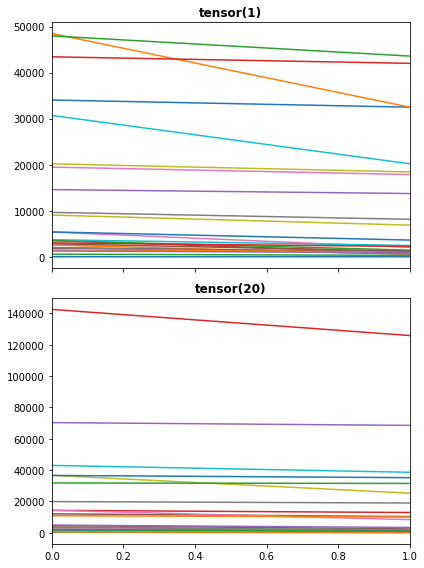

In [30]:
dls.show_batch()

In [ ]:
y
plt.plot(X[0])

In [2]:
window_length = 21
horizon = 7

# time_series_df = df.drop(columns=['date', 'country', 'region', 'country_region'])
# print(time_series_df.head(5))

In [14]:
print(f'Dataframe: {df.shape}')
X, y = SlidingWindow(
    window_length, seq_first=True, get_x=['region_cat', 'confirmed', 'suspicion'], get_y=['delta_confirmed'],
    horizon=horizon)(df)
print(f'X: {X.shape}')
print(f'y: {y.shape}')

Dataframe: (7850, 16)
X: (7823, 3, 21)
y: (7823, 7)


In [27]:
splits = get_splits(y, valid_size=.2, stratify=False, random_state=23, shuffle=True)
splits
check_data(X, y, splits, False)

TypeError: check_data() takes from 1 to 3 positional arguments but 4 were given

In [89]:
# tfms  = [None, [Float()]]
# dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True)
# dsets

dls = get_ts_dls(X, y, tfms=None, splits=splits, bs=2)
dls.one_batch()

IndexError: list index out of range

In [44]:
dls.c

40

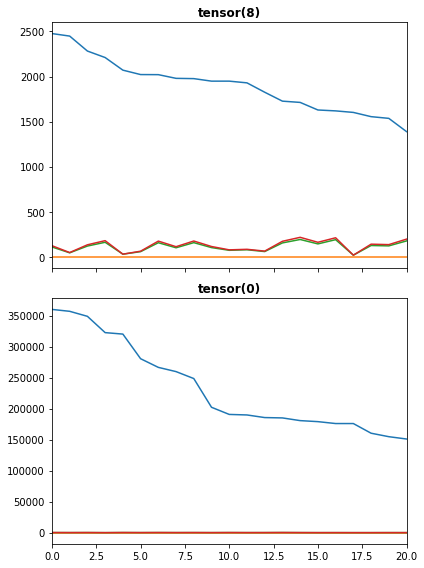

In [60]:
dls.show_batch()

In [51]:
# X,y,splits = get_UCR_data('LSST', split_data=False)
# print(X.shape)
# print(y.shape)


(4925, 6, 36)
(4925,)


In [88]:
print(y.shape)
# tfms=[None, [TSTesor(), ToFloat()]]
batch_tfms = None #TSStandardize(by_sample=True, by_var=True)
dls = get_ts_dls(X,y,splits=splits,tfms=tfms, batch_tfms=batch_tfms)

learn = ts_learner(dls, TSTPlus, metrics=[mae, rmse])
learn

(66748, 7)


IndexError: list index out of range

In [68]:
learn.fit_one_cycle(1, 1e-3)

IndexError: Target 12005 is out of bounds.